# STA 141B: Homework 4
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Dandi

Last Name: Peng

Student ID: 915553480

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Requesting freshness

In this portion, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1__ (20 pts)

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [2]:
import requests
import requests_cache
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
requests_cache.install_cache('food_cache')

In [43]:
key = 'PULS8FJKrLWRW7vDQd2Kez0iewRQUGPvW0VC1gY1'
food_uri = "https://api.nal.usda.gov/ndb/search/?format=json&api_key={}".format(key)

In [44]:
def ndb_search(term, datasource=''):
    
    respon = requests.get(food_uri, params={
    'q' : term,
    'ds': datasource,
    })
    res_json = respon.json()
    if 'errors' in res_json:
        res_list =[]
    else:
        res_list = res_json.get('list')['item']
    
    return res_list

In [45]:
ndb_search("quail eggs")

[{'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'offset': 0},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': "D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  'ndbno': '45178254',
  'offset': 1},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'offset': 2},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'offset': 3},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'offset': 4},
 {'ds': 'SR',
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'offset': 5}]

__Exercise 1.2__ (20 pts)

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

__My strategy:__
1. First I use str.replace() function to replace `'_'` by `blank space` at the `"name"` column of `"fresh.csv"`, then most of them are able to be found out.
2. I directly add `'raw'` after each food name as the `"Search terms"` parameter, and set the `"datasource"` parameter to be `"Standard Reference"` regarding to that foods are unbranded.
3. I create a blank data frame: `"df"`, then I use a `"for loop"` to get the final data frame. In the for loop, an `"if"` statement is used to deal with food cannot be found. That is to say, when the return value is `an empty list`, I append a row with `"NaN"` to `"df"`; for the other case, when the food is found, I only append the row whose `"offset"` is `"0"` to `"df"`. Finally I reset the row index of `"df"` to get the `"df_fnl"`.

In [46]:
data = pd.read_csv('fresh.csv')
for i in range(len(data['food'])):
    data.loc[i,'food'] = data.loc[i,'food'].replace('_', ' ')

In [47]:
df = pd.DataFrame()

for i in data.food:
    x = ndb_search(i+' raw', datasource= 'Standard Reference')
    if x == []:
        df = df.append(pd.Series([]), ignore_index = True)
    else:
        temp = pd.DataFrame(x)
        temp = temp.loc[temp['offset'] == 0]
        df = df.append(temp)

df_fnl = df.reset_index(drop = True)
df_fnl

,ds,group,name,ndbno,offset
0,SR,Fruits and Fruit Juices,"Watermelon, raw",09326,0.0
1,SR,Fruits and Fruit Juices,"Melons, cantaloupe, raw",09181,0.0
2,SR,Fruits and Fruit Juices,"Tangerine juice, raw",09221,0.0
3,SR,Fruits and Fruit Juices,"Strawberries, raw",09316,0.0
4,SR,Fruits and Fruit Juices,"Plums, raw",09279,0.0
5,SR,Fruits and Fruit Juices,"Oranges, raw, California, valencias",09201,0.0
6,SR,Fruits and Fruit Juices,"Raspberries, raw",09302,0.0
7,SR,Fruits and Fruit Juices,"Pomegranates, raw",09286,0.0
8,SR,Fruits and Fruit Juices,"Pineapple, raw, all varieties",09266,0.0
9,SR,Fruits and Fruit Juices,"Apricots, raw",09021,0.0


__Exercise 1.3__ (20 pts)

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [48]:
ndb_uri='https://api.nal.usda.gov/ndb/V2/reports?format=json&api_key={}'.format(key)

def ndb_report(ndb):
    respon = requests.get(ndb_uri, params={
    'ndbno' : ndb,
    })
    res_json = respon.json()
    if 'error' in res_json['foods'][0]:
        res_dict=[]
    else:
        res_dict=res_json['foods'][0].get('food').get('nutrients')
        if 'derivation' in res_dict[0]:
            for i in range(len(res_dict)):
                del res_dict[i]['derivation']
    
    return res_dict

In [49]:
ndb_report('09279')

[{'group': 'Proximates',
  'measures': [{'eqv': 165.0,
    'eunit': 'g',
    'label': 'cup, sliced',
    'qty': 1.0,
    'value': '143.93'},
   {'eqv': 66.0,
    'eunit': 'g',
    'label': 'fruit (2-1/8" dia)',
    'qty': 1.0,
    'value': '57.57'},
   {'eqv': 151.0,
    'eunit': 'g',
    'label': 'NLEA serving',
    'qty': 1.0,
    'value': '131.72'}],
  'name': 'Water',
  'nutrient_id': '255',
  'unit': 'g',
  'value': '87.23'},
 {'group': 'Proximates',
  'measures': [{'eqv': 165.0,
    'eunit': 'g',
    'label': 'cup, sliced',
    'qty': 1.0,
    'value': '76'},
   {'eqv': 66.0,
    'eunit': 'g',
    'label': 'fruit (2-1/8" dia)',
    'qty': 1.0,
    'value': '30'},
   {'eqv': 151.0,
    'eunit': 'g',
    'label': 'NLEA serving',
    'qty': 1.0,
    'value': '69'}],
  'name': 'Energy',
  'nutrient_id': '208',
  'unit': 'kcal',
  'value': '46'},
 {'group': 'Proximates',
  'measures': [{'eqv': 165.0,
    'eunit': 'g',
    'label': 'cup, sliced',
    'qty': 1.0,
    'value': '1.15'},
 

__Exercise 1.4__ (20 pts) Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

__Answer:__
    
From the question, in order to use `kilocalories` as a measure of `"nutrition"` of foods, I select the second element of `ndb_report()` returned list to get the `Energy` value (whose unit is `kcal`) of each food, then I get the `kcal` table with only one column shown the `Energy Value per 100 g`.

Next I concrate the table of `fresh.csv`, the table from __Exercise 1.2__ and the `kcal` table to get the __`fnl`__ table.

From The USDA Food Composition Databases, it states that `"Nutrient values and weights are for ` __`edible portion`__`"`. Therefore, it is reasonable for us to use the following formula as a standard to compare the best combination of price, yield and nutrition:

$Standard = \frac{price\,per\,100\,g}{Yield \,\times \,Energy\,Value\,per\,100\,g}$ 

Where $price\,per\,100\,g$ can be derived from $price\,per\,lb$. (__`100 g = 0.22 lbs`__)

Then the $Standard$ tells us `the price of per kcl` for each food, the lowest ones are those provide the best combination of price, yield and nutrition.

Upon this analysis, by viewing the below __`Price per Kcal Comparation`__ graph, we can conclude that `"bananas"`, `"potatoes"`, `"sweet potatoes"` and `"avocados"` tend to provide the best combination of price, yield and nutrition.

In [50]:
# get the kcal table with only one column shown the Energy Value per 100 g

kcal=[]        
for i in df_fnl['ndbno']:
    item = ndb_report(i)
    if item == []:
        kcal.append(['NaN'])
    else:
        kcal.append([item[1].get('value')])

kcal = pd.DataFrame(kcal,columns=['Energy_value_per_100g_(kcal)'])

In [51]:
# concrate the table of fresh.csv, the table from Exercise 1.2 and the kcal table

fnl = pd.concat([data, df_fnl, kcal], axis=1)
fnl = fnl.drop(['form', 'type', 'ds', 'group', 'offset'], axis = 1)
fnl

,price_per_lb,yield,lb_per_cup,price_per_cup,food,name,ndbno,Energy_value_per_100g_(kcal)
0,0.333412,0.520000,0.330693,0.212033,watermelon,"Watermelon, raw",09326,30
1,0.535874,0.510000,0.374786,0.393800,cantaloupe,"Melons, cantaloupe, raw",09181,34
2,1.377962,0.740000,0.407855,0.759471,tangerines,"Tangerine juice, raw",09221,43
3,2.358808,0.940000,0.319670,0.802171,strawberries,"Strawberries, raw",09316,32
4,1.827416,0.940000,0.363763,0.707176,plums,"Plums, raw",09279,46
5,1.035173,0.730000,0.407855,0.578357,oranges,"Oranges, raw, California, valencias",09201,49
6,6.975811,0.960000,0.319670,2.322874,raspberries,"Raspberries, raw",09302,52
7,2.173590,0.560000,0.341717,1.326342,pomegranate,"Pomegranates, raw",09286,83
8,0.627662,0.510000,0.363763,0.447686,pineapple,"Pineapple, raw, all varieties",09266,50
9,3.040072,0.930000,0.363763,1.189102,apricots,"Apricots, raw",09021,48


In [52]:
# remove rows with "NaN"

fnl = (fnl.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)).reset_index(drop = True)
fnl

,price_per_lb,yield,lb_per_cup,price_per_cup,food,name,ndbno,Energy_value_per_100g_(kcal)
0,0.333412,0.520000,0.330693,0.212033,watermelon,"Watermelon, raw",09326,30
1,0.535874,0.510000,0.374786,0.393800,cantaloupe,"Melons, cantaloupe, raw",09181,34
2,1.377962,0.740000,0.407855,0.759471,tangerines,"Tangerine juice, raw",09221,43
3,2.358808,0.940000,0.319670,0.802171,strawberries,"Strawberries, raw",09316,32
4,1.827416,0.940000,0.363763,0.707176,plums,"Plums, raw",09279,46
5,1.035173,0.730000,0.407855,0.578357,oranges,"Oranges, raw, California, valencias",09201,49
6,6.975811,0.960000,0.319670,2.322874,raspberries,"Raspberries, raw",09302,52
7,2.173590,0.560000,0.341717,1.326342,pomegranate,"Pomegranates, raw",09286,83
8,0.627662,0.510000,0.363763,0.447686,pineapple,"Pineapple, raw, all varieties",09266,50
9,3.040072,0.930000,0.363763,1.189102,apricots,"Apricots, raw",09021,48


In [53]:
# add a new column which shows the "Standard" (price per kcal) to "fnl"

fnl['Energy_value_per_100g_(kcal)'] = pd.to_numeric(fnl['Energy_value_per_100g_(kcal)'])
fnl['price per kcal'] = fnl['price_per_lb']* 0.22 /(fnl['yield']*fnl['Energy_value_per_100g_(kcal)'])
fnl

,price_per_lb,yield,lb_per_cup,price_per_cup,food,name,ndbno,Energy_value_per_100g_(kcal),price per kcal
0,0.333412,0.520000,0.330693,0.212033,watermelon,"Watermelon, raw",09326,30,0.004702
1,0.535874,0.510000,0.374786,0.393800,cantaloupe,"Melons, cantaloupe, raw",09181,34,0.006799
2,1.377962,0.740000,0.407855,0.759471,tangerines,"Tangerine juice, raw",09221,43,0.009527
3,2.358808,0.940000,0.319670,0.802171,strawberries,"Strawberries, raw",09316,32,0.017252
4,1.827416,0.940000,0.363763,0.707176,plums,"Plums, raw",09279,46,0.009298
5,1.035173,0.730000,0.407855,0.578357,oranges,"Oranges, raw, California, valencias",09201,49,0.006367
6,6.975811,0.960000,0.319670,2.322874,raspberries,"Raspberries, raw",09302,52,0.030743
7,2.173590,0.560000,0.341717,1.326342,pomegranate,"Pomegranates, raw",09286,83,0.010288
8,0.627662,0.510000,0.363763,0.447686,pineapple,"Pineapple, raw, all varieties",09266,50,0.005415
9,3.040072,0.930000,0.363763,1.189102,apricots,"Apricots, raw",09021,48,0.014982


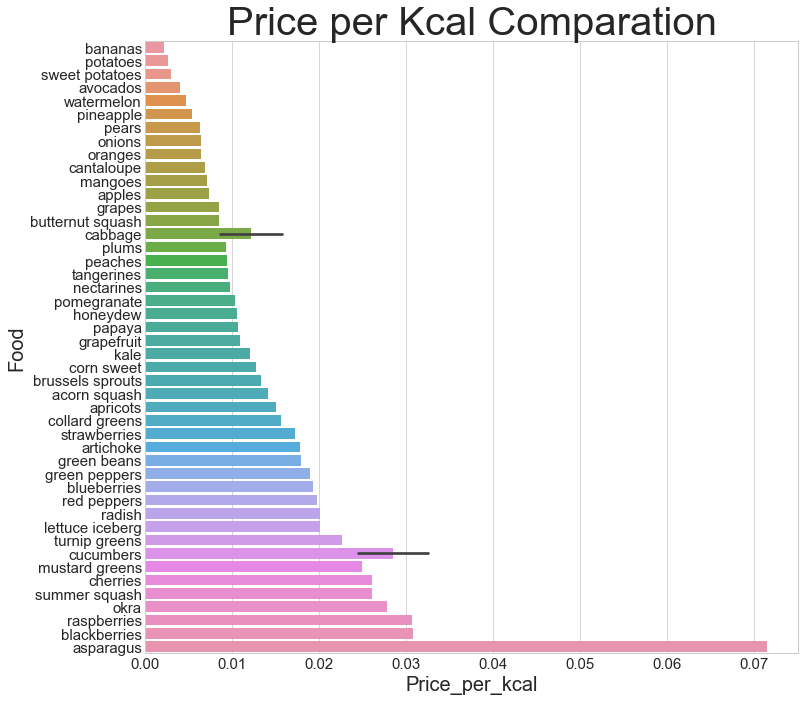

In [54]:
# plot the comparation graph (where there are lines in "cabbages" and "cucumbers" because of the repeated rows in "fresh.csv")

import seaborn as sns

fnl_plot = pd.melt(fnl, id_vars=['food'], value_vars=['price per kcal'])
fnl_plot = fnl_plot.sort_values('value')


sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 11.27)
plot=sns.barplot(x='value', y='food', data=fnl_plot)
plot.axes.set_title("Price per Kcal Comparation",fontsize=40)
plot.set_xlabel("Price_per_kcal",fontsize=20)
plot.set_ylabel("Food",fontsize=20)
plot.tick_params(labelsize=15)